In [ ]:
# prompt: import torch


import torch


Subir archivo zip pendiente----->>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_images.zip to test_images.zip


In [ ]:
# prompt: abrir con numpy esta direccion de archivo de imagenes. /content/test_images.zip

import numpy as np
import matplotlib.pyplot as plt



# Sección nueva

Descomprimir la imagen

In [ ]:
import zipfile
import os

In [ ]:
# Obtén el nombre del archivo zip subido
test_images = list(uploaded.keys())[0]

# Crea un directorio para extraer el contenido del archivo zip
extract_dir = 'extracted_images'
os.makedirs(extract_dir, exist_ok=True)

# Descomprime el archivo zip
with zipfile.ZipFile(test_images, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Lista los archivos extraídos
extracted_files = os.listdir(extract_dir)
print("Archivos extraídos:", extracted_files)

Archivos extraídos: ['test_image_png_2560.png', 'test_image_png_3095.png', 'test_image_png_5254.png', 'test_image_png_1622.png', 'test_image_png_1999.png', 'test_image_png_1500.png', 'test_image_png_6199.png', 'test_image_png_1688.png', 'test_image_png_4073.png', 'test_image_png_1886.png', 'test_image_png_2506.png', 'test_image_png_7313.png', 'test_image_png_393.png', 'test_image_png_5633.png', 'test_image_png_6226.png', 'test_image_png_5133.png', 'test_image_png_6339.png', 'test_image_png_7996.png', 'test_image_png_3625.png', 'test_image_png_1849.png', 'test_image_png_6884.png', 'test_image_png_5596.png', 'test_image_png_1030.png', 'test_image_png_6253.png', 'test_image_png_6218.png', 'test_image_png_5827.png', 'test_image_png_547.png', 'test_image_png_3795.png', 'test_image_png_3860.png', 'test_image_png_5689.png', 'test_image_png_4647.png', 'test_image_png_5617.png', 'test_image_png_1250.png', 'test_image_png_2039.png', 'test_image_png_72.png', 'test_image_png_663.png', 'test_image_

In [ ]:
import matplotlib.image as mpimg

# Sección nueva

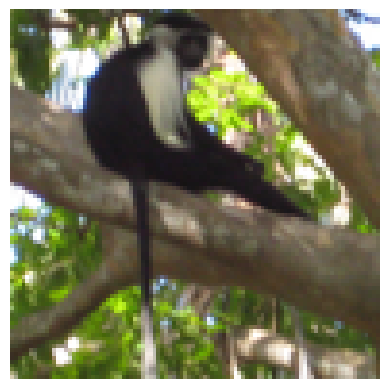

In [ ]:
if extracted_files:
    first_image_path = os.path.join(extract_dir, extracted_files[3])
    img = mpimg.imread(first_image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No se encontraron archivos extraídos.")

In [ ]:
import random


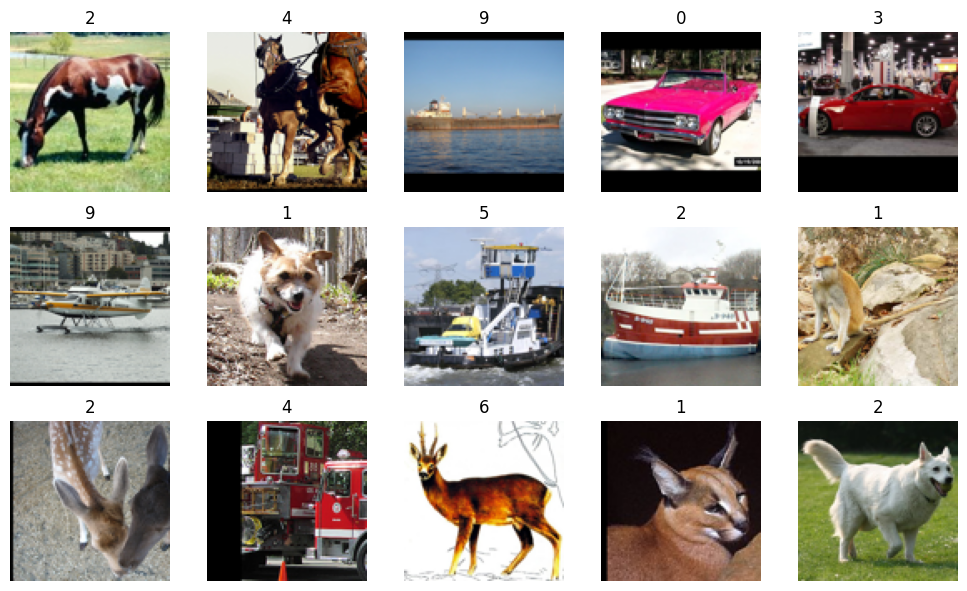

In [ ]:

images = []
for file_name in extracted_files:
    file_path = os.path.join(extract_dir, file_name)
    img = plt.imread(file_path)
    images.append(img)

# Convertir a un array numpy
X = np.array(images)

# Generar etiquetas aleatorias (solo para este ejemplo)
Y = np.random.randint(0, 10, size=len(images))  # Esto es solo un ejemplo, debes obtener tus etiquetas de manera adecuada

# Mostrar imágenes
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        img = X[ix]
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(Y[ix])
plt.tight_layout()
plt.show()

In [ ]:
torch.cuda.is_available()

True

In [ ]:
x = torch.randn(10000,10000)
y = torch.randn(10000,10000)

%time z = x*y

In [ ]:
x = torch.randn(10000,10000).cuda()
y = torch.randn(10000,10000).cuda()

%time z = x*y

CPU times: user 9.17 ms, sys: 6.18 ms, total: 15.4 ms
Wall time: 71.3 ms


In [ ]:
#X_train, X_test, y_train, y_test = X[:5000] / 255., X[800:] / 255., Y[:5000].astype(int), Y[800:].astype(int)

In [ ]:
X = np.array(images)

# Generar etiquetas aleatorias (solo para este ejemplo)
Y = np.random.randint(0, 10, size=len(images))  # Esto es solo un ejemplo, debes obtener tus etiquetas de manera adecuada

# Normalizar los datos de entrenamiento y prueba
X_train = X[:5000] / 255.
X_test = X[800:] / 255.
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_train.reshape(X_train.shape[0], -1)
# Convertir las etiquetas de entrenamiento y prueba a entero
y_train = Y[:5000].astype(int)
y_test = Y[800:].astype(int)


In [ ]:

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [ ]:
D_in, H, D_out = X_train_flat.shape[1], 100, 10

# Pesos del MLP (copiamos en gpu)
w1 = torch.tensor(np.random.normal(loc=0.0,
          scale = np.sqrt(2/(D_in+H)),
          size = (D_in, H)), requires_grad=True, device="cuda", dtype=torch.float32)
b1 = torch.zeros(H, requires_grad=True, device="cuda", dtype=torch.float32)

w2 = torch.tensor(np.random.normal(loc=0.0,
          scale = np.sqrt(2/(H+D_out)),
          size = (H, D_out)), requires_grad=True, device="cuda", dtype=torch.float32)
b2 = torch.zeros(D_out, requires_grad=True, device="cuda", dtype=torch.float32)

# Convertimos datos a tensores y copiamos en gpu
X_t = torch.from_numpy(X_train_flat).float().cuda()
Y_t = torch.from_numpy(y_train).long().cuda()

epochs = 1000
lr = 0.8
log_each = 20
l = []

for e in range(1, epochs + 1):

    # Forward
    h = X_t @ w1 + b1
    h_relu = h.clamp(min=0)  # ReLU
    y_pred = h_relu @ w2 + b2

    # Loss
    loss = cross_entropy(y_pred, Y_t)
    l.append(loss.item())

    # Backpropagation (calculamos todos los gradientes automáticamente)
    loss.backward()

    with torch.no_grad():
        # Actualizamos pesos
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # Ponemos a cero los gradientes para la siguiente iteración
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")

Epoch 20/1000 Loss 2.30097
Epoch 40/1000 Loss 2.30073
Epoch 60/1000 Loss 2.30061
Epoch 80/1000 Loss 2.30053
Epoch 100/1000 Loss 2.30046
Epoch 120/1000 Loss 2.30040
Epoch 140/1000 Loss 2.30034
Epoch 160/1000 Loss 2.30028
Epoch 180/1000 Loss 2.30022
Epoch 200/1000 Loss 2.30016
Epoch 220/1000 Loss 2.30010
Epoch 240/1000 Loss 2.30004
Epoch 260/1000 Loss 2.29999
Epoch 280/1000 Loss 2.29993
Epoch 300/1000 Loss 2.29987
Epoch 320/1000 Loss 2.29981
Epoch 340/1000 Loss 2.29976
Epoch 360/1000 Loss 2.29970
Epoch 380/1000 Loss 2.29964
Epoch 400/1000 Loss 2.29958
Epoch 420/1000 Loss 2.29952
Epoch 440/1000 Loss 2.29947
Epoch 460/1000 Loss 2.29941
Epoch 480/1000 Loss 2.29935
Epoch 500/1000 Loss 2.29929
Epoch 520/1000 Loss 2.29923
Epoch 540/1000 Loss 2.29917
Epoch 560/1000 Loss 2.29911
Epoch 580/1000 Loss 2.29905
Epoch 600/1000 Loss 2.29899
Epoch 620/1000 Loss 2.29892
Epoch 640/1000 Loss 2.29886
Epoch 660/1000 Loss 2.29880
Epoch 680/1000 Loss 2.29874
Epoch 700/1000 Loss 2.29867
Epoch 720/1000 Loss 2.29

TorchScrip

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class CompleteModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CompleteModel, self).__init__()
        self.preprocessing = Preprocessing()
        self.mlp = MLP(input_size, hidden_size, output_size)
        self.postprocessing = Postprocessing()

    def forward(self, x):
        x = self.preprocessing(x)
        x = self.mlp(x)
        x = self.postprocessing(x)
        return x


In [ ]:
class Preprocessing(nn.Module):
    def __init__(self):
        super(Preprocessing, self).__init__()

    def forward(self, x):
        # Esperamos un batch de imágenes sin normalizar
        # Normalización
        x = (x / 255.)
        x = (x - 0.1307) / 0.3081
        # Dimensiones -> [bs, c, h, w]
        x = x.unsqueeze(1)
        return x


In [ ]:
class Postprocessing(nn.Module):
    def __init__(self):
        super(Postprocessing, self).__init__()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Devolvemos distribución de probabilidad
        # y clase con mayor probabilidad
        return self.softmax(x), torch.argmax(x, dim=1)

# Creamos una instancia del modelo completo
complete_model = CompleteModel(input_size=784, hidden_size=100, output_size=10)

# Convertimos el modelo completo a modo de evaluación
complete_model.eval()

# Guardamos el modelo como TorchScript
scripted_model = torch.jit.script(complete_model)
scripted_model.save('complete_model.pt')

FRAMEWORD ONNX

In [ ]:

!pip install onnx
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 15.7 MB/s eta 0:00:00


In [ ]:

import onnx
import onnxruntime
from tqdm import tqdm

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
class CompleteModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CompleteModel, self).__init__()
        self.preprocessing = Preprocessing()
        self.mlp = MLP(input_size, hidden_size, output_size)
        self.postprocessing = Postprocessing()

    def forward(self, x):
        x = self.preprocessing(x)
        x = self.mlp(x)
        x = self.postprocessing(x)
        return x


In [ ]:
class Preprocessing(nn.Module):
    def __init__(self):
        super(Preprocessing, self).__init__()

    def forward(self, x):
        # Esperamos un batch de imágenes sin normalizar
        # Normalización
        x = (x / 255.)
        x = (x - 0.1307) / 0.3081
        # Dimensiones -> [bs, c, h, w]
        x = x.unsqueeze(1)
        return x


In [ ]:
class Postprocessing(nn.Module):
    def __init__(self):
        super(Postprocessing, self).__init__()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Devolvemos distribución de probabilidad
        # y clase con mayor probabilidad
        return self.softmax(x), torch.argmax(x, dim=1)

# Creamos una instancia del modelo completo
complete_model = CompleteModel(input_size=784, hidden_size=100, output_size=10)

# Supongamos que ya has entrenado tu modelo y ahora quieres exportarlo a ONNX

# Creamos un ejemplo de entrada
x = torch.rand(32, 1, 28, 28)

# Exportamos el modelo a ONNX
torch.onnx.export(complete_model,        # El modelo
                  x,                     # Un ejemplo del input
                  "complete_model.onnx", # Nombre del archivo para guardar el modelo
                  export_params=True,    # Guardar los pesos de la red
                  opset_version=10,      # Versión de ONNX
                  do_constant_folding=True,  # Optimizaciones
                  input_names=['input'],     # Nombre de los inputs
                  output_names=['output'],   # Nombre de los outputs
                  dynamic_axes={'input': {0: 'batch_size'},    # Ejes con longitud variable (para poder usar diferentes tamaños de batch)
                                'output': {0: 'batch_size'}})


RuntimeError: mat1 and mat2 shapes cannot be multiplied (896x28 and 784x100)

In [ ]:
def onnx_evaluate(model_path, dataloader):
    # Cargamos el modelo ONNX
    ort_session = onnxruntime.InferenceSession(model_path)
    acc = []
    with torch.no_grad():
        for batch in tqdm(dataloader['test']):
            X, y = batch
            X = X.numpy()
            # Generamos los inputs
            ort_inputs = {ort_session.get_inputs()[0].name: X}
            # Extraemos los outputs
            ort_outs = ort_session.run(None, ort_inputs)[0]
            acc.append((y == np.argmax(ort_outs, axis=1)).mean())
    return np.mean(acc)

# Ahora podemos usar la función `onnx_evaluate` para evaluar el modelo ONNX
acc = onnx_evaluate("complete_model.onnx", dataloader)
print(f"Accuracy: {acc:.5f}")